<a href="https://colab.research.google.com/github/PrashantSBasnet/AI_ML/blob/master/Calculus%20II/Calculus_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gradients Applied to Machine Learning

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import math # for constant pi

In [ ]:
def f(my_x, my_y):
    return my_x**2 - my_y**2

In [ ]:
xs = np.linspace(-3, 3, 1000)

In [ ]:
#holding y=constant

In [ ]:
zs_wrt_x = f(xs, 0)

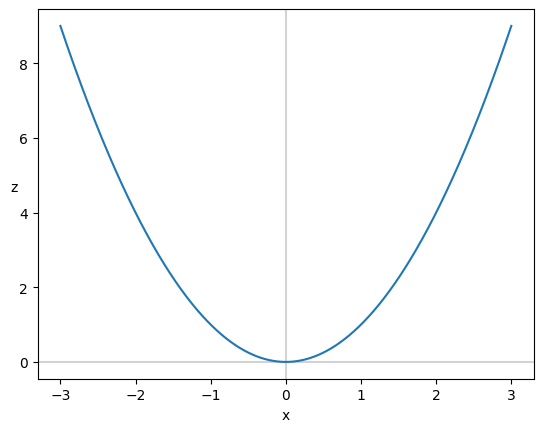

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('x')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_x)

In [ ]:
def delz_delx(my_x, my_y): # y isn't relevant for *this* partial derivative; it often would be
    return 2*my_x

In [ ]:
x_samples = [-2, -1, 0, 1, 2]

In [ ]:
colors = ['red', 'orange', 'green', 'blue', 'purple']

In [ ]:
def point_and_tangent_wrt_x(my_xs, my_x, my_y, my_f, fprime, col):

    my_z = my_f(my_x, my_y) # z = f(x, y)
    plt.scatter(my_x, my_z, c=col, zorder=3)

    tangent_m = fprime(my_x, my_y) # Slope is partial derivative of f(x, y) w.r.t. x
    tangent_b = my_z - tangent_m*my_x # Line is z=mx+b, so b=z-mx
    tangent_line = tangent_m*my_xs + tangent_b

    plt.plot(my_xs, tangent_line, c=col,
             linestyle='dashed', linewidth=0.7, zorder=3)

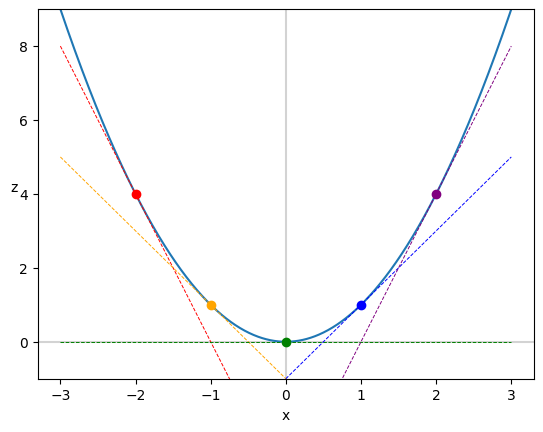

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, x in enumerate(x_samples):
    point_and_tangent_wrt_x(xs, x, 0, f, delz_delx, colors[i])

plt.ylim(-1, 9)
plt.xlabel('x')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_x)

Using Autodiff to calculate Partial Derivatives (using library provived by PyTorch)

In [ ]:
x = torch.tensor(0.).requires_grad_()
x

tensor(0., requires_grad=True)

In [ ]:
y = torch.tensor(0.).requires_grad_()
y

tensor(0., requires_grad=True)

In [ ]:
z = f(x,y) #forward pass
z

tensor(0., grad_fn=<SubBackward0>)

In [ ]:
z.backward() #autodiff

In [ ]:
x.grad #gradient wrt x

tensor(0.)

In [ ]:
y.grad #gradient wrt y

tensor(-0.)

Partial Derivatives of a Cylinder's Volume

In [ ]:
def cylinder_vol(my_r, my_l):
    return math.pi * my_r**2 * my_l

In [ ]:
#assuming radius=3
r = torch.tensor(3.).requires_grad_()
r

tensor(3., requires_grad=True)

In [ ]:
#assuming length=5
l = torch.tensor(5.).requires_grad_()
l

tensor(5., requires_grad=True)

In [ ]:
#volume
v = cylinder_vol(r, l) #forward pass
v

tensor(141.3717, grad_fn=<MulBackward0>)

In [ ]:
v.backward() #backward pass, performing automatic diff

In [ ]:
l.grad

tensor(28.2743)

In [ ]:
math.pi *3**2 #radius is 3 #cross checking

28.274333882308138

Integral

In [1]:
from scipy.integrate import quad # 'quadrature; = numerical integartion (as opposed to sybolic)

In [2]:
def g(x):
  return x/2

In [3]:
quad(g,1,2)

(0.75, 8.326672684688674e-15)

In [4]:
def h(x):
  return 2*x

In [5]:
quad(h,3,4)

(7.0, 7.771561172376096e-14)

Finding the Area Under the ROC curve

In [8]:
from sklearn.metrics import auc

In [10]:
xs = [0,0, 0.5, 0.5, 1]
ys = [0,0.5,0.5,1, 1]

In [11]:
auc(xs,ys)

0.75